In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#physical const
L=1
h=1#h_bar default
m=1
e=1

In [3]:
#scaling for dimensionless units
scl_x=1/L
scl_t=h/(m*L*m*L)
scl_k=e*m*L*L*L/(h*h)
scl_w=m*L*L/h

In [4]:
#sim param
N=100
k=0
w=0
n=1

dx=1/N
dt=0.0001

In [5]:
def diff_H(psi):
    return -0.5*(psi[2]+psi[0]-2*psi[1])/(dx*dx)
def op_H(psi_list,t):
    return (psi_list.rolling(3,center=True).apply(diff_H,raw=True)+k*(x-0.5)*psi_list*np.sin(w*t)).fillna(0)

def step(psiR,psiI,t,dt):
    psiR=psiR+dt/2*op_H(psiI,t)
    psiI=psiI-dt*op_H(psiR,t+dt/2)
    psiR=psiR+dt/2*op_H(psiI,t+dt)
    return psiR, psiI

def op_norm(psiR,psiI):
    return dx*np.sum(psiR**2+psiI**2)

def op_x(psiR,psiI):
    return dx*np.sum(x*(psiR**2+psiI**2))

def op_eps(psiR,psiI):
    return dx*np.sum(psiR*op_H(psiR,t)+psiI*op_H(psiI,t))

def op_rho(psiR,psiI):
    return psiR**2+psiI**2

def eps_n(n):
    return 0.5*n*n*np.pi*np.pi

In [6]:
x=np.linspace(0,1,N)

psiR=pd.Series(np.sqrt(2)*np.sin(n*np.pi*x))
psiI=pd.Series(np.zeros(N))

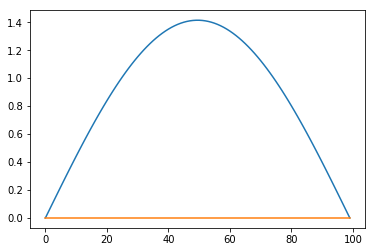

In [7]:
psiR.plot()
psiI.plot()

CPU times: user 395 ms, sys: 3.71 ms, total: 399 ms
Wall time: 398 ms


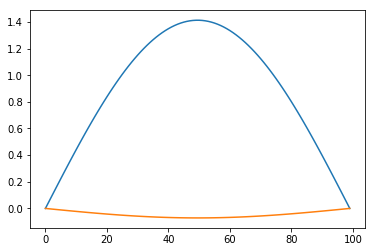

In [8]:
%%time
for i in range(100):
    psiR, psiI=step(psiR,psiI,i*dt,dt)

psiR.plot()
psiI.plot()

CPU times: user 7min 14s, sys: 503 ms, total: 7min 14s
Wall time: 7min 15s


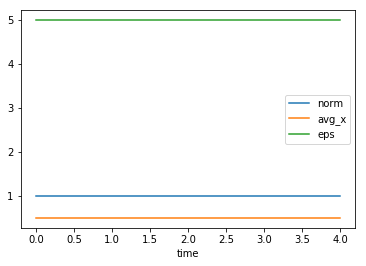

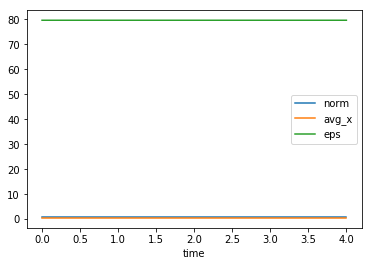

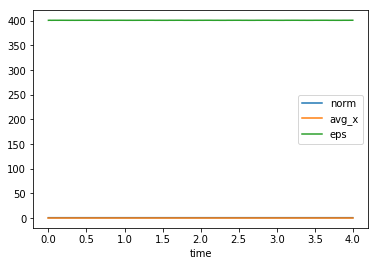

In [9]:
%%time
time=4
x=np.linspace(0,1,N)
save_step=100

for n in [1,4,9]:
    psiR=pd.Series(np.sqrt(2)*np.sin(n*np.pi*x))
    psiI=pd.Series(np.zeros(N))

    t_list=np.linspace(0,time,int(time/dt))
    norm_list=[]
    ax_list=[]
    eps_list=[]
    #rho_list=[]
    watcher=0
    for t in t_list:
        if watcher%save_step==0:
            watcher=0
            norm_list.append(op_norm(psiR,psiI))
            ax_list.append(op_x(psiR,psiI))
            eps_list.append(op_eps(psiR,psiI))
            #rho_list.append(op_rho(psiR,psiI))
        watcher+=1
        psiR, psiI=step(psiR,psiI,t,dt)
    df=pd.DataFrame()
    df['time']=np.linspace(0,time,int(time/dt)//save_step)
    df['norm']=norm_list
    df['avg_x']=ax_list
    df['eps']=eps_list
    #df['rho']=rho_list
    df=df.set_index('time')
    df.plot()
    df.to_csv('Sim_'+'w_'+str(round(w))+'_k_'+str(k)+'_n_'+str(n)+'_epsnm_'+str(round(2/np.pi/np.pi*w))+'_t_'+str(round(time))+'.csv')

In [15]:
w_list=[]
for n in range(1,6):
    for m in range(1,6):
        w_list.append(abs(eps_n(n)-eps_n(m)))
w_list=np.unique(w_list)[1:]
for w in w_list:
    print(str(round(w,2)))

14.8
24.67
34.54
39.48
44.41
59.22
74.02
78.96
103.63
118.44


[ 14.8044066   24.674011    34.5436154   39.4784176   44.4132198
  59.21762641  74.02203301  78.95683521 103.63084621 118.43525281]


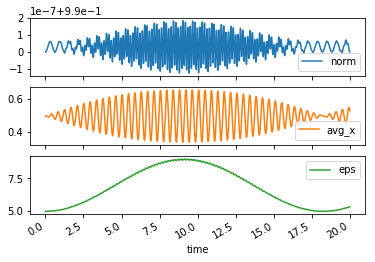

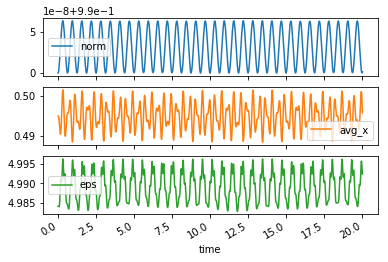

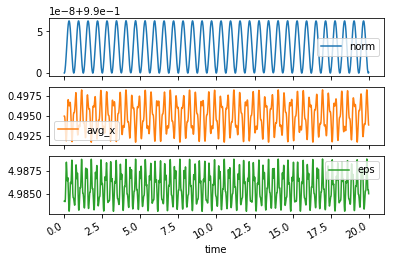

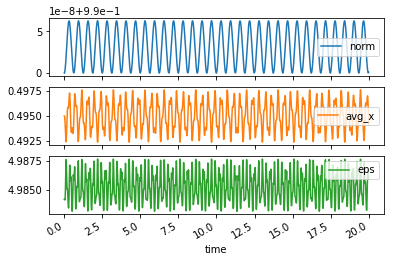

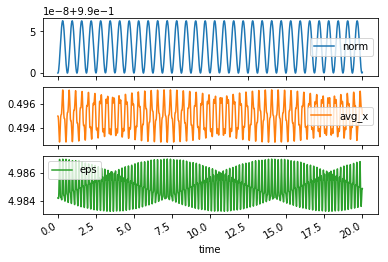

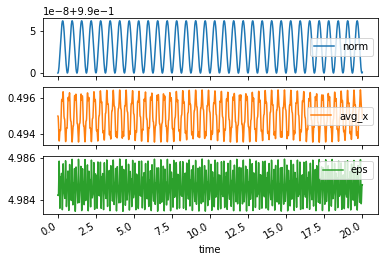

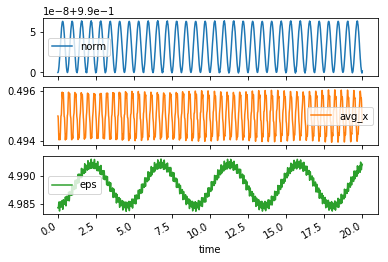

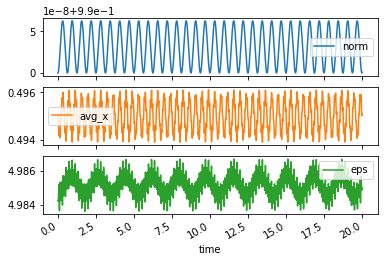

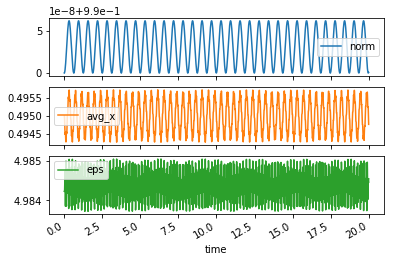

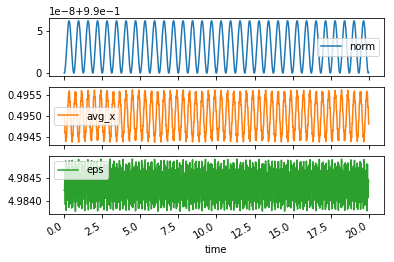

In [16]:
time=20
x=np.linspace(0,1,N)
save_step=100

n=1
k=1
print(w_list)
for w in w_list:
    psiR=pd.Series(np.sqrt(2)*np.sin(n*np.pi*x))
    psiI=pd.Series(np.zeros(N))

    t_list=np.linspace(0,time,int(time/dt))
    norm_list=[]
    ax_list=[]
    eps_list=[]
    #rho_list=[]
    watcher=0
    for t in t_list:
        if watcher%save_step==0:
            watcher=0
            norm_list.append(op_norm(psiR,psiI))
            ax_list.append(op_x(psiR,psiI))
            eps_list.append(op_eps(psiR,psiI))
            #rho_list.append(op_rho(psiR,psiI))
        watcher+=1
        psiR, psiI=step(psiR,psiI,t,dt)
    df=pd.DataFrame()
    df['time']=np.linspace(0,time,int(time/dt)//save_step)
    df['norm']=norm_list
    df['avg_x']=ax_list
    df['eps']=eps_list
    #df['rho']=rho_list
    df=df.set_index('time')
    df.plot(subplots=True)
    df.to_csv('Sim_'+'w_'+str(round(w,2))+'_k_'+str(k)+'_n_'+str(n)+'_epsnm_'+str(round(2/np.pi/np.pi*w))+'_t_'+str(round(time))+'.csv')